This notebook contains the generated plots for the temporal uncertainty quantification section.

### Temporal distribution of uncertainty

In [3]:
import os
from pathlib import Path

import torch
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import logging
from pathlib import Path
from typing import Optional, Union

import h5py
import numpy as np
import torch

In [67]:
def save_fig(fig_path: str, filename: str):
    file_path = Path(fig_path)
    file_path.mkdir(exist_ok=True, parents=True)
    plt.savefig(os.path.join(file_path, f"{filename}.png"),
                dpi=200, format="png", bbox_inches='tight')
    print(f"Saved figure to {file_path}.")

In [6]:
def load_h5_file(file_path: Union[str, Path], sl: Optional[slice] = None,
                 to_torch: bool = True, dtype=None):
    """
    Given a file path to an h5 file assumed to house a tensor, load that
    tensor into memory and return a pointer.

    Parameters
    ----------
    file_path: str
        h5 file to load.
    sl: Optional[slice]
        Slice to load (data is written in chunks for faster access to rows).
    to_torch: bool
        Transform loaded numpy array into torch tensor
    dtype
        Set the specific dtype of the transformed torch tensor
    """

    file_path = str(file_path) if isinstance(file_path, Path) else file_path
    with h5py.File(file_path, "r") as file:
        data = file.get("array")

        if sl is not None:
            data = data[sl]  # Auto. np.ndarray
        else:
            data = data[:]  # Auto. np.ndarray

        if to_torch:
            if dtype is not None:
                data = torch.from_numpy(data).to(
                    dtype=dtype)  # e.g. torch.uint8
            else:
                data = torch.from_numpy(data).to(dtype=torch.float)

        return data

In [7]:
def normalize(v, new_min = 0, new_max = 1):
    v_min, v_max = torch.min(v), torch.max(v)
    return (v - v_min)/(v_max - v_min) * (new_max - new_min) + new_min

In [144]:
# MODIFY HERE
ant = load_h5_file(".../results/test_time/h5_files/ANTWERP/pred_combo.h5")
mos = load_h5_file(".../results/test_time/h5_files/MOSCOW/pred_combo.h5")

#### Fig: normalized uncertainty vs. prediction horizons

In [138]:
ch = {"vol":[0, 2, 4, 6], "speed":[1, 3, 5, 7]}
v = "speed"

ant_epi = normalize(ant[:, 2, :, ch[v]].mean(dim=(-1))).mean(dim=0)
ant_alea = normalize(ant[:, 3, :, ch[v]].mean(dim=(-1))).mean(dim=0)
mos_epi = normalize(mos[:, 2, :, ch[v]].mean(dim=(-1))).mean(dim=0)
mos_alea = normalize(mos[:, 3, :, ch[v]].mean(dim=(-1))).mean(dim=0)

Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.


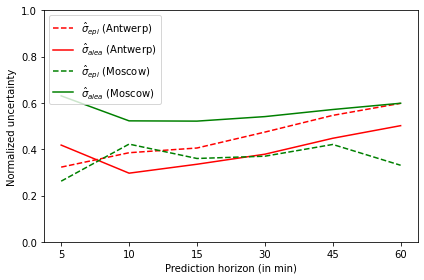

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ant_epi, color="red", linestyle="--", label=r"$\hat{\sigma}_{epi}$ (Antwerp)")
ax.plot(ant_alea, color="red", linestyle="-", label=r"$\hat{\sigma}_{alea}$ (Antwerp)")
ax.plot(mos_epi, color="green", linestyle="--", label=r"$\hat{\sigma}_{epi}$ (Moscow)")
ax.plot(mos_alea, color="green", linestyle="-", label=r"$\hat{\sigma}_{alea}$ (Moscow)")
ax.set_ylim(0, 1)
ax.set_ylabel("Normalized uncertainty")
xaxis = [5, 10, 15, 30, 45, 60]
plt.xticks(np.arange(6), xaxis)
ax.set_xlabel("Prediction horizon (in min)")
ax.legend(loc="upper left")
plt.tight_layout()

save_fig(".../zips/test_100_1_all_uq_methods/fig-temporal-unc", "speed_pred_horizons")

#### Fig: uncertainty vs. MSE

In [167]:
ant_gt = normalize(ant[:, 0, 5, ch[v]].mean(dim=-1))
ant_unc = normalize(ant[:, 2:, 5, ch[v]].mean(dim=-1).sum(dim=1))
ant_mse = normalize(ant[:, 1, 5, ch[v]].mean(dim=-1))
mos_gt = normalize(mos[:, 0, 5, ch[v]].mean(dim=-1))
mos_unc = normalize(mos[:, 2:, 5, ch[v]].mean(dim=-1).sum(dim=1))
mos_mse = normalize(mos[:, 1, 5, ch[v]].mean(dim=-1))

Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Desktop/Master-Thesis/code/zips/test_100_1_all_uq_methods/fig-temporal-unc.
Saved figure to /Users/atimans/Deskto

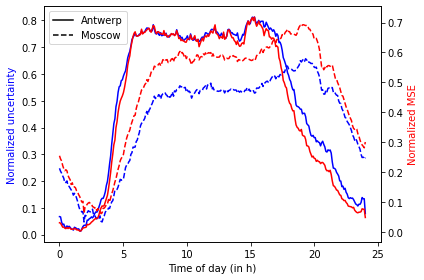

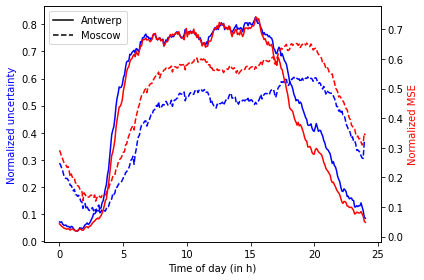

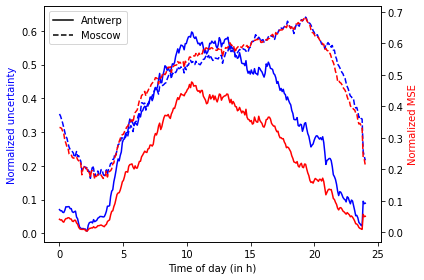

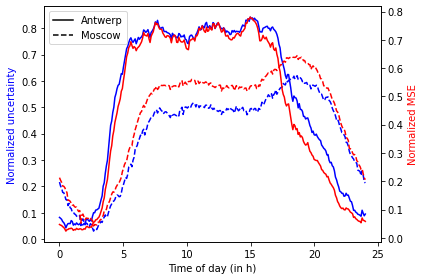

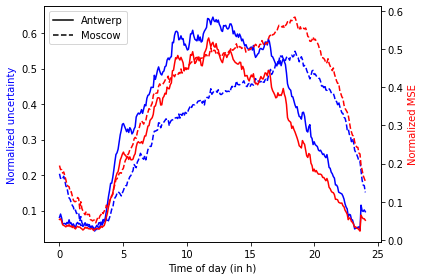

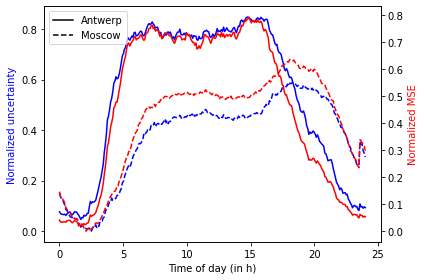

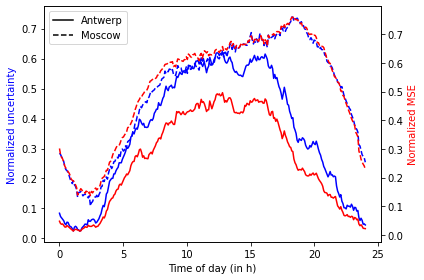

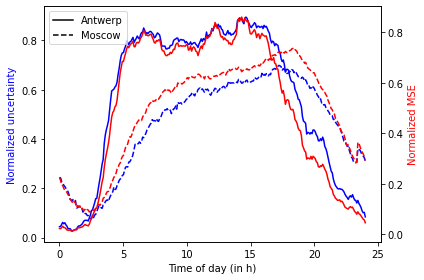

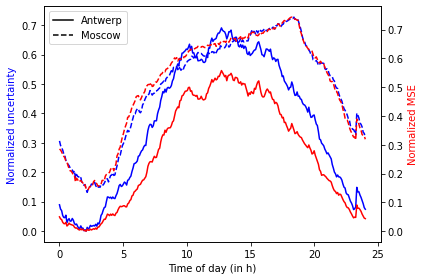

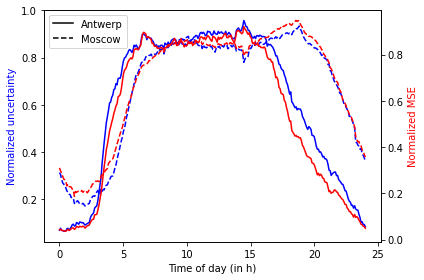

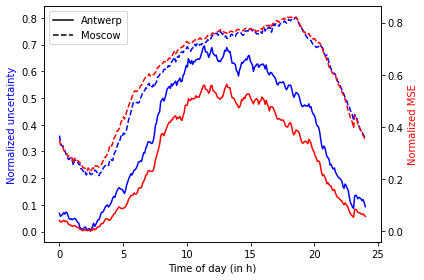

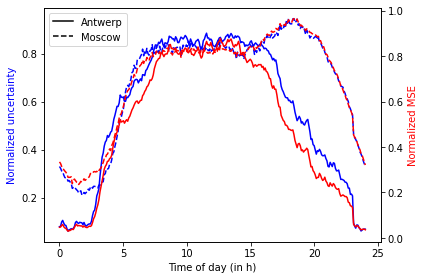

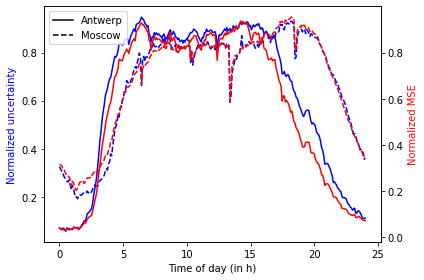

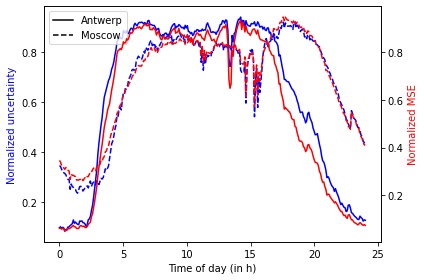

In [168]:
for idx in range(14):
    i, j = idx*288, idx*288+288
    x = np.linspace(0, 24, 288)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    ax.plot(x, ant_unc[i:j], c="blue", linestyle="-", label="Antwerp")
    ax.plot(x, mos_unc[i:j], c="blue", linestyle="--", label="Moscow")
    ax.set_ylabel("Normalized uncertainty", c="blue")
    # ax.set_ylim(0, 1)
    ax.set_xlabel("Time of day (in h)")

    ax2 = ax.twinx()
    # ax2.plot(x, ant_gt[i:j], c="red", linestyle="-", label="Antwerp")
    # ax2.plot(x, mos_gt[i:j], c="red", linestyle="--", label="Moscow")
    # ax2.set_ylabel("Normalized ground truth", c="red")
    ax2.plot(x, ant_mse[i:j], c="red", linestyle="-", label="Antwerp")
    ax2.plot(x, mos_mse[i:j], c="red", linestyle="--", label="Moscow")
    ax2.set_ylabel("Normalized MSE", c="red")
    # ax2.set_ylim(0, 1)
    ax2.set_xlabel("Time of day (in h)")
    
    leg = ax.legend(loc="upper left")
    leg.legendHandles[0].set_color("black")
    leg.legendHandles[1].set_color("black")
    # ax2.legend(loc="upper left")
    plt.tight_layout()
    save_fig(".../zips/test_100_1_all_uq_methods/fig-temporal-unc", f"unc_mse_{i}")